In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import folium
from folium.plugins import HeatMap
import itertools

In [5]:
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")
os.chdir('/content/uber-fares-dataset')
uber_df = pd.read_csv("uber.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 7.04M/7.04M [00:00<00:00, 49.0MB/s]

**username:** blakeandersonw

**key:** 5c7b7542c5ad7af0d6015b98bfa868b4

In [6]:
df = uber_df.copy()

In [7]:
drop = ["Unnamed: 0", "key", "fare_amount", "passenger_count"]
df.drop(drop, inplace=True, axis=1)

In [8]:
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217
1,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325
2,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647
3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349
4,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247
...,...,...,...,...,...
199995,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297
199996,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620
199997,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588
199998,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['Weekday'] = df['pickup_datetime'].dt.day_name()
df['Day'] = df['pickup_datetime'].dt.day
df['Month'] = df['pickup_datetime'].dt.month
df['Minute'] = df['pickup_datetime'].dt.minute
df['Hour'] = df['pickup_datetime'].dt.hour

In [10]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Weekday,Day,Month,Minute,Hour
0,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,Thursday,7,5,52,19
1,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,Friday,17,7,4,20
2,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,Monday,24,8,45,21
3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,Friday,26,6,22,8
4,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,Thursday,28,8,47,17


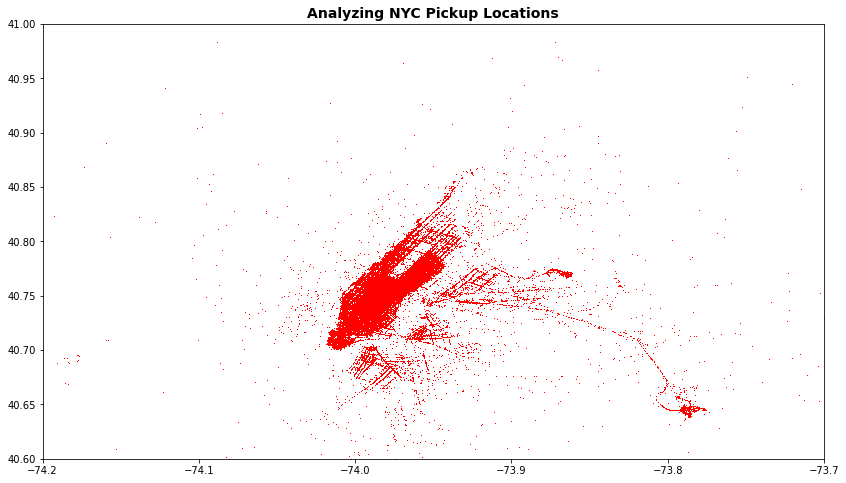

In [11]:
plt.figure(figsize=(14,8))
plt.plot(df['pickup_longitude'], df['pickup_latitude'], 'r+', ms = 0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)
plt.title('Analyzing NYC Pickup Locations', fontsize = 14, fontweight = 'bold')
plt.show() #plt heat map of nyc

In [12]:
df_wd = df[df['Weekday']=='Sunday']
df_wd

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Weekday,Day,Month,Minute,Hour
6,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,Sunday,12,10,4,7
47,2015-01-04 09:17:47+00:00,-73.979523,40.727310,-73.984879,40.760651,Sunday,4,1,17,9
53,2012-12-09 02:12:29+00:00,-73.937809,40.850558,-73.944454,40.834959,Sunday,9,12,12,2
61,2011-10-30 11:34:39+00:00,-73.975307,40.757499,-74.010737,40.711715,Sunday,30,10,34,11
71,2015-05-17 14:56:39+00:00,-73.954315,40.769703,-73.990135,40.757439,Sunday,17,5,56,14
...,...,...,...,...,...,...,...,...,...,...
199965,2013-03-24 15:25:56+00:00,-73.979663,40.766310,-73.901523,40.902372,Sunday,24,3,25,15
199979,2014-06-08 21:38:43+00:00,-73.975209,40.752767,-73.963186,40.757905,Sunday,8,6,38,21
199988,2011-10-09 02:02:40+00:00,-73.988674,40.739342,-73.990730,40.738980,Sunday,9,10,2,2
199990,2015-05-24 22:05:56+00:00,-73.987106,40.741894,-73.952240,40.772957,Sunday,24,5,5,22


In [13]:
df_wd.groupby(['pickup_latitude', 'pickup_longitude'])['Weekday'].agg('count')

pickup_latitude  pickup_longitude
-74.001407        40.731167          1
-74.000467        40.742502          1
-73.993383        40.743327          1
-73.992452        40.757847          1
-73.992438        40.737770          1
                                    ..
 41.047142       -73.567558          1
 41.068468       -73.703745          1
 41.366138       -73.137393          8
 47.383332       -73.976280          1
 404.433332      -73.960828          1
Name: Weekday, Length: 25910, dtype: int64

In [14]:
df_heat = df_wd.groupby(['pickup_latitude', 'pickup_longitude'])['Weekday'].agg('count').reset_index()
df_heat

,pickup_latitude,pickup_longitude,Weekday
0,-74.001407,40.731167,1
1,-74.000467,40.742502,1
2,-73.993383,40.743327,1
3,-73.992452,40.757847,1
4,-73.992438,40.737770,1
...,...,...,...
25905,41.047142,-73.567558,1
25906,41.068468,-73.703745,1
25907,41.366138,-73.137393,8
25908,47.383332,-73.976280,1


In [22]:
df_heat.rename(columns = {'Weekday' : 'No. of Trips'}, inplace=True)
df_heat.head()

,pickup_latitude,pickup_longitude,No. of Trips
0,-74.001407,40.731167,1
1,-74.000467,40.742502,1
2,-73.993383,40.743327,1
3,-73.992452,40.757847,1
4,-73.992438,40.737770,1


In [23]:
bm = folium.Map(location = [40.7128, -74.0060], zoom_start = 9)

In [24]:
bm

In [41]:
def plot_hm(df, day): #create heatmap by weekday using folium
    bm = folium.Map()
    df_wd = df[df['Weekday']==day]
    return HeatMap(df_wd.groupby(['pickup_latitude', 'pickup_longitude'])['Weekday'].agg('count').reset_index(), zoom=10, radius=10).add_to(bm)

In [42]:
plot_hm(df, 'Saturday') #e.g. saturday
bm

In [45]:
def create_day_series(df): #rides on day
    
    day_df = pd.Series(df.groupby(['pickup_datetime']).size())
    day_df.index = pd.DatetimeIndex(day_df.index)
    day_df = day_df.resample('1D').apply(np.sum)
    return day_df

df_ds = create_day_series(df)

In [46]:
df_ds2 = df_ds.loc[df_ds.index >= '2014-06-30'] #take smaller sample to prevent from overfitting (this is the last year of the dataset)

In [47]:
df_ds2

pickup_datetime
2014-06-30 00:00:00+00:00    79
2014-07-01 00:00:00+00:00    68
2014-07-02 00:00:00+00:00    84
2014-07-03 00:00:00+00:00    82
2014-07-04 00:00:00+00:00    47
                             ..
2015-06-26 00:00:00+00:00    81
2015-06-27 00:00:00+00:00    75
2015-06-28 00:00:00+00:00    65
2015-06-29 00:00:00+00:00    63
2015-06-30 00:00:00+00:00    66
Freq: D, Length: 366, dtype: int64

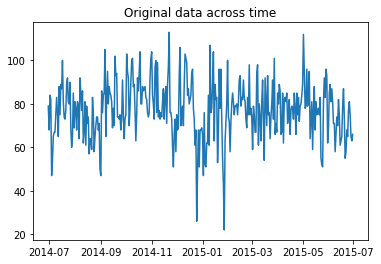

<Figure size 432x288 with 0 Axes>

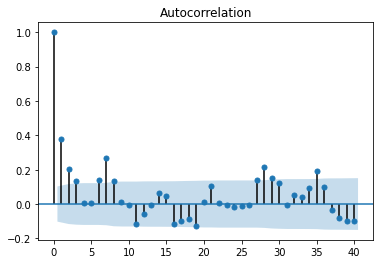

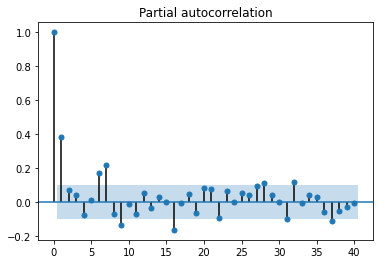

In [48]:
plt.figure(1)
plt.plot(df_ds2)
plt.title('Original data across time')
plt.figure(2)
plot_acf(df_ds2, lags = 40)
plt.title('Autocorrelation')
plot_pacf(df_ds2, lags = 40)
plt.title('Partial autocorrelation') 
plt.show()

In [49]:
print('p-value: {}'.format(adfuller(df_ds2)[1]))

p-value: 8.876500493113278e-06


In [50]:
print('p-value: {}'.format(adfuller(df_ds2.diff(periods=1).dropna())[1]))

p-value: 1.1415600570982322e-28


In [55]:
def rmse(x,y):
    return sqrt(mean_squared_error(x,y))

In [53]:
def SARIMAX_call(time_series, p_list, d_list, q_list, P_list, D_list, Q_list, s_list, test_period): #sarimax function to return errors of inputs
    training_ts = time_series[:-test_period]
    testing_ts = time_series[-test_period:]

    param_combinations = itertools.product(p_list, d_list, q_list, P_list, D_list, Q_list, s_list)
    error_table = []
    for p, d, q, P, D, Q, s in param_combinations:
        SARIMAX_model = SARIMAX(training_ts.astype(float), order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_invertibility=False)
        SARIMAX_model_fit = SARIMAX_model.fit(disp=0)

        predictions = SARIMAX_model_fit.forecast(steps=test_period, typ='levels')
        RMSE = rmse(testing_ts.values, predictions.values)

        AIC = round(SARIMAX_model_fit.aic, 2)
        BIC = round(SARIMAX_model_fit.bic, 2)
        error_table.append({'p': p, 'd': d, 'q': q, 'P': P, 'D': D, 'Q': Q, 's': s, 'AIC': AIC, 'BIC': BIC, 'RMSE': RMSE})

    return pd.DataFrame(error_table)

In [56]:
ns_ar = [0,1,2] #check SARIMAX to get error table to find optimal inputs
ns_diff = [1]
ns_ma = [0,1,2]
s_ar = [0,1]
s_diff = [0,1] 
s_ma = [1,2]
s_list = [7]

error_table = SARIMAX_call(df_ds2,ns_ar,ns_diff,ns_ma,s_ar,s_diff,s_ma,s_list,30)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimiz

In [57]:
error_table.sort_values(by='RMSE').head(5) #inputs with the lowest error statistics

,p,d,q,P,D,Q,s,AIC,BIC,RMSE
26,1,1,0,0,1,1,7,2621.73,2633.10,7.354898
30,1,1,0,1,1,1,7,2619.56,2634.73,7.469622
28,1,1,0,1,0,1,7,2668.41,2683.67,7.509356
27,1,1,0,0,1,2,7,2619.04,2634.21,7.565239
29,1,1,0,1,0,2,7,2666.32,2685.39,7.580709


In [64]:
def predict(time_series, p, d, q, P, D, Q, s, n_days, conf): #time series prediction using ARIMA on the uber dataset
    training_ts = time_series[:-n_days]
    testing_ts = time_series[-n_days:]
    SARIMAX_model = SARIMAX(training_ts.astype(float),order=(p, d, q),seasonal_order=(P, D, Q, s),enforce_invertibility=False,)
    SARIMAX_model_fit = SARIMAX_model.fit(disp=0)

    SARIMAX_prediction = SARIMAX_model_fit.get_forecast(steps=n_days, alpha=1 - conf).summary_frame()
    SARIMAX_prediction.index = pd.date_range(start=testing_ts.index[0], periods=n_days, freq=testing_ts.index.freq)

    plt.figure(figsize=(8, 6))
    plt.title("Plot of uber data and predicted values using ARIMA ")
    plt.xlabel("Time")
    plt.ylabel("Number of Trips")
    plt.plot(time_series, "k-", label="Uber data")
    plt.plot(SARIMAX_prediction["mean"],"b--",label="Next {} days predicted values".format(n_days),)
    plt.legend()
    plt.show()
    return SARIMAX_prediction[["mean", "mean_ci_lower", "mean_ci_upper"]]

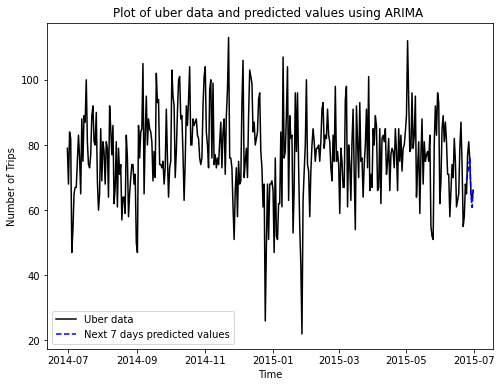

In [65]:
prediction = predict(df_ds2,1,1,0,0,1,1,7,7,0.80)